<a href="https://colab.research.google.com/github/AlbertoRotondo/Labo1/blob/master/LaboFinaleRotondo_Alberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav 
import IPython
import warnings 
import soundfile
%matplotlib inline


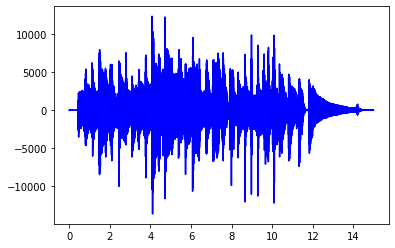

In [195]:
#elaborazione del segnale originale
wavname_basso = "contrabbasso.wav"
freq_sampling = 44100
IPython.display.Audio(wavname_basso, rate = freq_sampling)

# returns a tuple of two items: the first is the sampling rate in samples per second, the second is a numpy array with all the data read from the file
f_s, suona_basso = wav.read(wavname_basso)
#print("campionamento a intervalli di "+f_s)

#numero campionamenti operati nel segnale
N = len(suona_basso)
#lunghezza di un singolo intervallo
T_s = 1/f_s
#totale del tempo moltiplico singolo intervallo di campionamento per tutti i valori tra 0 e N
t = T_s *np.arange(N)


#trasformata segnale originale 
f = f_s/N * np.arange(N)
fourierOriginal = np.fft.fft(suona_basso)
plt.plot(t,suona_basso, '-b')

IPython.display.Audio(wavname_basso, rate=f_s)



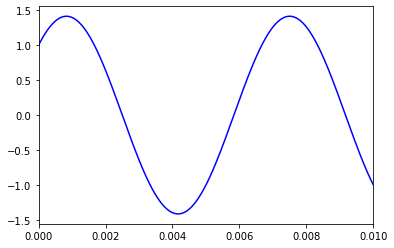

In [200]:
#creazione del rumore (noise)
fs = 44100
frequenza = 150
T = 14
tempi = np.linspace(0,T, len(suona_basso),endpoint=False)
noise = np.sin(2*np.pi*frequenza*tempi)+np.cos(2*np.pi*frequenza*tempi)
fourierNoise = np.fft.fft(suona_basso)
plt.xlim(0, 0.01)
plt.plot(tempi,noise,'-b')
IPython.display.Audio(noise, rate=fs)

<ipython-input-201-43ca8ab3aa29>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(noise), len(suona_basso))
<ipython-input-201-43ca8ab3aa29>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(fs, f_s)


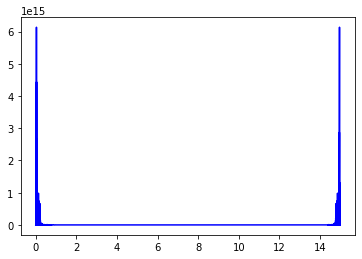

In [201]:
#segnale con noise 

#controllo che le lunghezze dei segnali siano uguali
assert(len(noise), len(suona_basso))
#controllo i campionamenti uguali 
assert(fs, f_s)
#applico noise con convoluzione 
#result = noise * suona_basso
result=np.multiply(fourierOriginal, fourierNoise);
plt.plot(t,np.abs(result), '-b')
sound = np.real((np.fft.ifft(result)))
IPython.display.Audio(sound, rate=fs)


In [199]:
#operazione di filtraggio sulla trasformata 
